In [1]:

# import the necessary packages that will be utilized
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import pathlib
import seaborn as sns
import plotnine as gg
from plotnine import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
# assign the desired file a variable using pathlib.Path command
input_file = pathlib.Path("../0.data-download/data/sample_info.csv")

# set the data frame to be the desired .csv file that is read by pandas(pd) using the pd.read_csv(desired file read as a previously defined variable)
df_sample_info = pd.read_csv(input_file)

# assign the desired file a variable using pathlib.Path command
input_file2 = pathlib.Path("../0.data-download/data/CRISPR_gene_dependency.csv")

# set the data frame to be the desired .csv file that is read by pandas(pd) using the pd.read_csv(desired file read as a previously defined variable)
df_gene_dependency = pd.read_csv(input_file2)

In [3]:
# print the parameters of the read file
print(df_sample_info.shape)
df_sample_info.head(5)

(1840, 29)


,DepMap_ID,cell_line_name,stripped_cell_line_name,CCLE_Name,alias,COSMICID,sex,source,RRID,WTSI_Master_Cell_ID,...,lineage_sub_subtype,lineage_molecular_subtype,default_growth_pattern,model_manipulation,model_manipulation_details,patient_id,parent_depmap_id,Cellosaurus_NCIt_disease,Cellosaurus_NCIt_id,Cellosaurus_issues
0,ACH-000016,SLR 21,SLR21,SLR21_KIDNEY,NaN,NaN,NaN,Academic lab,CVCL_V607,NaN,...,NaN,NaN,NaN,NaN,NaN,PT-JnARLB,NaN,Clear cell renal cell carcinoma,C4033,NaN
1,ACH-000032,MHH-CALL-3,MHHCALL3,MHHCALL3_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,NaN,Female,DSMZ,CVCL_0089,NaN,...,b_cell,NaN,NaN,NaN,NaN,PT-p2KOyI,NaN,Childhood B acute lymphoblastic leukemia,C9140,NaN
2,ACH-000033,NCI-H1819,NCIH1819,NCIH1819_LUNG,NaN,NaN,Female,Academic lab,CVCL_1497,NaN,...,NSCLC_adenocarcinoma,NaN,NaN,NaN,NaN,PT-9p1WQv,NaN,Lung adenocarcinoma,C3512,NaN
3,ACH-000043,Hs 895.T,HS895T,HS895T_FIBROBLAST,NaN,NaN,Female,ATCC,CVCL_0993,NaN,...,NaN,NaN,2D: adherent,NaN,NaN,PT-rTUVZQ,NaN,Melanoma,C3224,NaN
4,ACH-000049,HEK TE,HEKTE,HEKTE_KIDNEY,NaN,NaN,NaN,Academic lab,CVCL_WS59,NaN,...,NaN,NaN,NaN,immortalized,NaN,PT-qWYYgr,NaN,NaN,NaN,No information is available about this cell li...


In [4]:
# print the parameters of the read file
print(df_gene_dependency.shape)
df_gene_dependency.head(5)

(1086, 17387)


,DepMap_ID,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
0,ACH-000001,0.094568,0.012519,0.027460,0.025962,0.073412,0.027340,0.020199,0.284733,0.022084,...,0.037449,0.080585,0.034309,0.007142,0.004241,0.082956,0.012000,0.003592,0.012679,0.324623
1,ACH-000004,0.012676,0.049011,0.075933,0.033215,0.013176,0.097497,0.005015,0.153166,0.007358,...,0.038768,0.230569,0.007125,0.021209,0.011203,0.060266,0.128375,0.005911,0.004645,0.042530
2,ACH-000005,0.053957,0.027968,0.010139,0.005448,0.018599,0.081636,0.005457,0.159904,0.050884,...,0.017479,0.274568,0.054525,0.033396,0.033416,0.034712,0.092832,0.012482,0.020843,0.050412
3,ACH-000007,0.026704,0.083588,0.008853,0.011299,0.027288,0.028349,0.032573,0.166503,0.047045,...,0.196233,0.615338,0.011212,0.002200,0.005432,0.035241,0.138445,0.103161,0.146222,0.274833
4,ACH-000009,0.059383,0.051826,0.015370,0.011721,0.030062,0.078373,0.042128,0.184783,0.032335,...,0.152385,0.405712,0.029011,0.002816,0.056461,0.189550,0.328064,0.035161,0.058402,0.269194


In [5]:
# check if "figures" directory exists and create directory if it does not
fig_dir = pathlib.Path("figures")
fig_dir.mkdir(exist_ok=True)

Number of Samples Documented in sample_info.csv: 1840 

Number of Samples Included in CRISPR_gene_dependency.csv: 1086 

Ages sampled from: 
 [nan '11' '55' '48' '1' '61' '16' '35' '50' '29' '77' '36' '5' '74' '26'
 'Adult' '20' '52' '19' '64' '60' '6' '42' '10' '58' '66' '68' '9' '71'
 '27' '7' '72' '69' '44' '59' '56' '22' '46' '73' '57' '3' '63' '31' '78'
 '53' '62' '0' '28' '54' '75' '67' '15' '49' '84' '37' '40' '70' '41' '47'
 '30' '43' '21' '45' '65' 'Pediatric' '2' 'Fetus' '14' '76' '51' '23' '82'
 '38' '12' '79' '80' '25' '17' '34' '86' '39' '81' '4' '18' '13' '33' '24'
 '88' '8' '32' '85' '94' '83' '89' '87'] 

All Cancer Types: 
 ['Kidney Cancer' 'Leukemia' 'Lung Cancer' 'Non-Cancerous' 'Sarcoma'
 'Lymphoma' 'Colon/Colorectal Cancer' 'Pancreatic Cancer' 'Gastric Cancer'
 'Rhabdoid' 'Endometrial/Uterine Cancer' 'Esophageal Cancer'
 'Breast Cancer' 'Brain Cancer' 'Ovarian Cancer' 'Bone Cancer' 'Myeloma'
 'Head and Neck Cancer' 'Bladder Cancer' 'Skin Cancer' 'Bile Duct Cancer'


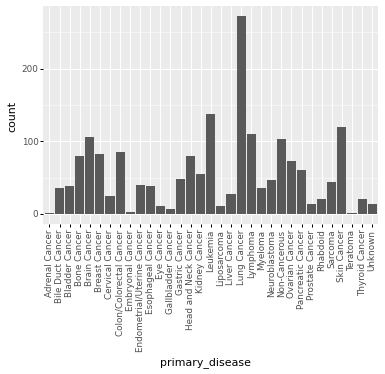


number of sample overlaps between sample_info.csv and CRISPR_gene_dependency.csv: 1086 



In [6]:
# sample_info.csv visualization
# how many samples from sample_info.csv?
n_samples = len(df_sample_info["DepMap_ID"].unique())
print(f"Number of Samples Documented in sample_info.csv: {n_samples} \n")

# how many samples from CRISPR_gene_dependency.csv?
n_samples2 = len(df_gene_dependency["DepMap_ID"].unique())
print(f"Number of Samples Included in CRISPR_gene_dependency.csv: {n_samples2} \n")

# how many different ages were sampled from? 
all_ages = df_sample_info["age"].unique()
print(f"Ages sampled from: \n {all_ages} \n")


# how many different types of cancer?
all_cancers = df_sample_info["primary_disease"].unique()
print(f"All Cancer Types: \n {all_cancers} \n")

# create a bar chart that shows the number of types of cancer sampled 
data = df_sample_info
cancer_types_bar = (
    gg.ggplot(data, gg.aes(x="primary_disease")) + gg.geom_bar() + gg.theme(axis_text_x =element_text(angle = 90))
    )
print(cancer_types_bar)
sct_output = pathlib.Path("./figures/sample_cancer_types_bar_chart.png")
cancer_types_bar.save(sct_output)

# identify which samples are included in both sample_info.csv and CRISPR_gene_dependency.csv
similar_samples = list(set(df_sample_info["DepMap_ID"]) & set(df_gene_dependency["DepMap_ID"]))

# count the number of samples that overlap in both data sets 
sample_overlap = len(similar_samples)
print(f"number of sample overlaps between sample_info.csv and CRISPR_gene_dependency.csv: {sample_overlap} \n")

In [7]:
# how many different types of cancer?
dfsi = df_sample_info["DepMap_ID"].unique()
print(f"All Cancer Types: \n {dfsi} \n")
print(dfsi.shape)

All Cancer Types: 
 ['ACH-000016' 'ACH-000032' 'ACH-000033' ... 'ACH-002395' 'ACH-002396'
 'ACH-002397'] 

(1840,)


In [8]:
# how many different types of cancer?
dfgd = df_gene_dependency["DepMap_ID"].unique()
print(f"All Cancer Types: \n {dfgd} \n")
print(dfgd.shape)

All Cancer Types: 
 ['ACH-000001' 'ACH-000004' 'ACH-000005' ... 'ACH-002874' 'ACH-002875'
 'ACH-002926'] 

(1086,)


In [9]:
age_vector_to_clean = df_sample_info.loc[:, "age"].tolist()

age_categories = []
age_distribution = []

adult_threshold = 18

# Loop through each age entry to clean it
for age_entry in age_vector_to_clean:
    try:
        # If the age is an integer, apply appropriate category
        if int(age_entry) >= adult_threshold:
            age_categories.append("Adult")
        else:
            age_categories.append("Pediatric")
        
        # If the age is an integer, apply appropriate continuous measure
        age_distribution.append(int(age_entry))

    except ValueError:
        # If conversion fails, categorize appropriately
        if pd.notnull(age_entry):
            age_categories.append(age_entry)
        else:
            age_categories.append("Missing")
        
        age_distribution.append(np.nan)


In [10]:
# New dataframe containing two new columns age_categories & age_distribution
df_age_visual = (
    df_sample_info.assign(
        age_categories=age_categories,
        age_distribution=age_distribution
    )
)

df_age_visual.head()

,DepMap_ID,cell_line_name,stripped_cell_line_name,CCLE_Name,alias,COSMICID,sex,source,RRID,WTSI_Master_Cell_ID,...,default_growth_pattern,model_manipulation,model_manipulation_details,patient_id,parent_depmap_id,Cellosaurus_NCIt_disease,Cellosaurus_NCIt_id,Cellosaurus_issues,age_categories,age_distribution
0,ACH-000016,SLR 21,SLR21,SLR21_KIDNEY,NaN,NaN,NaN,Academic lab,CVCL_V607,NaN,...,NaN,NaN,NaN,PT-JnARLB,NaN,Clear cell renal cell carcinoma,C4033,NaN,Missing,NaN
1,ACH-000032,MHH-CALL-3,MHHCALL3,MHHCALL3_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,NaN,Female,DSMZ,CVCL_0089,NaN,...,NaN,NaN,NaN,PT-p2KOyI,NaN,Childhood B acute lymphoblastic leukemia,C9140,NaN,Pediatric,11.0
2,ACH-000033,NCI-H1819,NCIH1819,NCIH1819_LUNG,NaN,NaN,Female,Academic lab,CVCL_1497,NaN,...,NaN,NaN,NaN,PT-9p1WQv,NaN,Lung adenocarcinoma,C3512,NaN,Adult,55.0
3,ACH-000043,Hs 895.T,HS895T,HS895T_FIBROBLAST,NaN,NaN,Female,ATCC,CVCL_0993,NaN,...,2D: adherent,NaN,NaN,PT-rTUVZQ,NaN,Melanoma,C3224,NaN,Adult,48.0
4,ACH-000049,HEK TE,HEKTE,HEKTE_KIDNEY,NaN,NaN,NaN,Academic lab,CVCL_WS59,NaN,...,NaN,immortalized,NaN,PT-qWYYgr,NaN,NaN,NaN,No information is available about this cell li...,Missing,NaN


In [11]:
# save the new data frame to a new .csv file in 0.data -download module
df_save_destination = pathlib.Path("../0.data-download/data/sample_info_age_column_cleaned.csv")
df_age_visual.to_csv(df_save_destination, index = False)

In [12]:
print(df_age_visual.shape)
df_age_visual.head()

(1840, 31)


,DepMap_ID,cell_line_name,stripped_cell_line_name,CCLE_Name,alias,COSMICID,sex,source,RRID,WTSI_Master_Cell_ID,...,default_growth_pattern,model_manipulation,model_manipulation_details,patient_id,parent_depmap_id,Cellosaurus_NCIt_disease,Cellosaurus_NCIt_id,Cellosaurus_issues,age_categories,age_distribution
0,ACH-000016,SLR 21,SLR21,SLR21_KIDNEY,NaN,NaN,NaN,Academic lab,CVCL_V607,NaN,...,NaN,NaN,NaN,PT-JnARLB,NaN,Clear cell renal cell carcinoma,C4033,NaN,Missing,NaN
1,ACH-000032,MHH-CALL-3,MHHCALL3,MHHCALL3_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,NaN,Female,DSMZ,CVCL_0089,NaN,...,NaN,NaN,NaN,PT-p2KOyI,NaN,Childhood B acute lymphoblastic leukemia,C9140,NaN,Pediatric,11.0
2,ACH-000033,NCI-H1819,NCIH1819,NCIH1819_LUNG,NaN,NaN,Female,Academic lab,CVCL_1497,NaN,...,NaN,NaN,NaN,PT-9p1WQv,NaN,Lung adenocarcinoma,C3512,NaN,Adult,55.0
3,ACH-000043,Hs 895.T,HS895T,HS895T_FIBROBLAST,NaN,NaN,Female,ATCC,CVCL_0993,NaN,...,2D: adherent,NaN,NaN,PT-rTUVZQ,NaN,Melanoma,C3224,NaN,Adult,48.0
4,ACH-000049,HEK TE,HEKTE,HEKTE_KIDNEY,NaN,NaN,NaN,Academic lab,CVCL_WS59,NaN,...,NaN,immortalized,NaN,PT-qWYYgr,NaN,NaN,NaN,No information is available about this cell li...,Missing,NaN


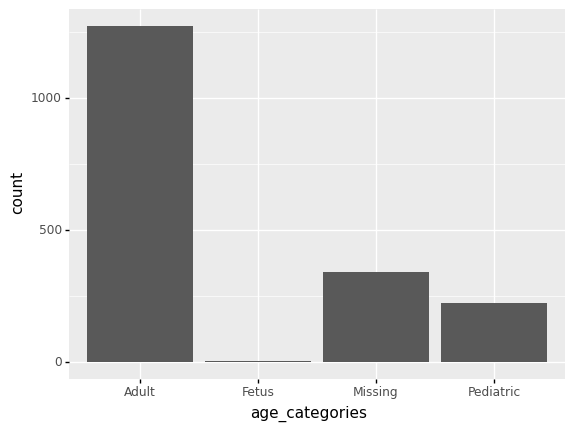

In [13]:
age_categories_bar = (
    gg.ggplot(df_age_visual, gg.aes(x="age_categories"))
    + gg.geom_bar()
)
print(age_categories_bar)
acb_output = pathlib.Path("./figures/age_categories_bar_chart.png")
age_categories_bar.save(acb_output)

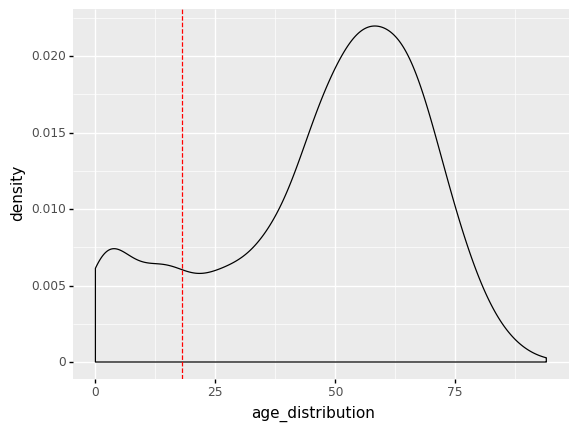

In [14]:
age_distribution_plot = (
    gg.ggplot(df_age_visual, gg.aes(x="age_distribution"))
    + gg.geom_density()
    + gg.geom_vline(xintercept=adult_threshold, linetype="dashed", color="red")
)
print(age_distribution_plot)
sad_output = pathlib.Path("./figures/sample_age_distribution_plot.png")
age_distribution_plot.save(sad_output)

In [15]:
pd.DataFrame(age_categories).loc[:, 0].value_counts()

Adult        1271
Missing       341
Pediatric     225
Fetus           3
Name: 0, dtype: int64

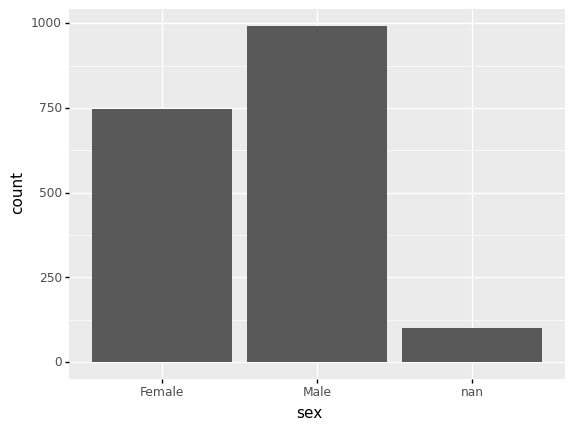

In [16]:
gendersamp = df_sample_info
gendersamp_plot = (
    gg.ggplot(gendersamp, gg.aes(x="sex")) + gg.geom_bar()
)
print(gendersamp_plot)
sgb_output = pathlib.Path("./figures/sample_gender_bar_chart.png")
gendersamp_plot.save(sgb_output)